In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
df = pd.read_csv("crop_yield.csv")

In [2]:
df.shape

(19689, 10)

In [34]:
categorical_cols = ['Crop', 'Season', 'State']
numerical_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

In [35]:
df['Crop'].unique()


array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [36]:
df['Season'].unique()  # For categorical column "Season"

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [37]:
df['State'].unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [38]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [39]:
df[categorical_cols]

,Crop,Season,State
0,0,4,2
1,1,1,2
2,8,1,2
3,9,4,2
4,11,1,2
...,...,...,...
19684,44,1,19
19685,53,2,19
19686,24,1,10
19687,40,1,10


In [40]:
X = df[categorical_cols + numerical_cols]  # Input features
y = df['Yield']  # Target variable

In [41]:
scaler = StandardScaler()
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [42]:
pca = PCA(n_components=5)  # Choose the number of components
X_pca = pca.fit_transform(X)

In [43]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,29.748494,-11.348454,-0.156954,2.230889,-1.655325
1,28.758985,-11.366572,-0.152184,-0.610238,-1.611156
2,21.763374,-11.601415,-0.215939,-0.629284,-1.599489
3,20.757312,-11.650418,-0.325323,2.309241,-1.417971
4,18.765195,-11.702027,-0.235711,-0.636966,-1.594531


In [44]:
pca.explained_variance_ratio_

array([0.73295242, 0.24449087, 0.00889999, 0.00468723, 0.00303045])

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
y_pred = rf_model.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [50]:
rmse

106.68334604611188

In [51]:
r2

0.9857953444130008

In [52]:
import joblib

# Save Random Forest Model & PCA
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(pca, "pca_transform.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

 Shows the importance of each principal component in making predictions.

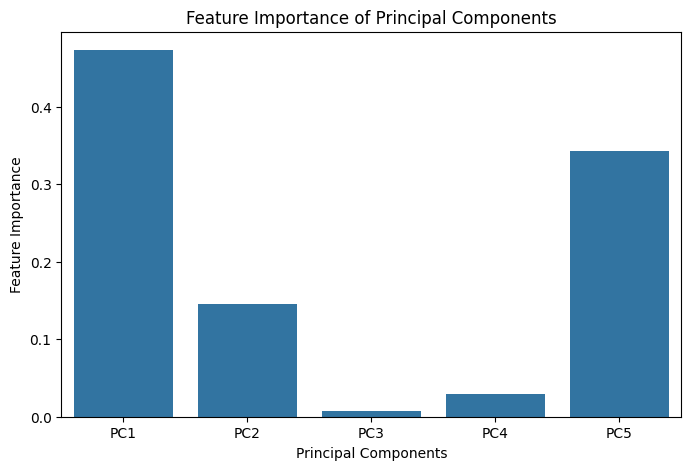

In [54]:
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(importances))], y=importances)
plt.xlabel('Principal Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Principal Components')
plt.show()

Helps assess how well the model's predictions align with actual values.

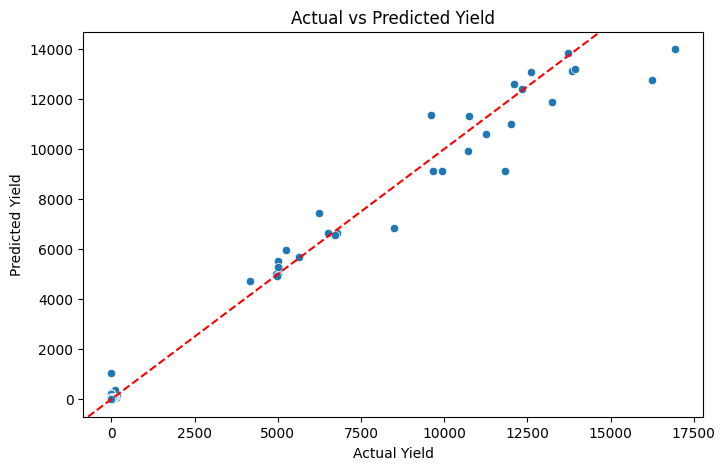

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.axline([0, 0], [1, 1], color='red', linestyle='--')  # Ideal line
plt.show()

 Shows the distribution of errors (difference between actual and predicted values).

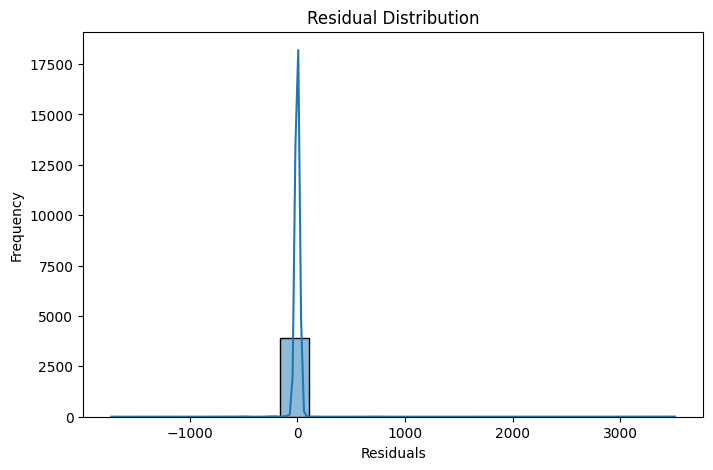

In [56]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()